# Esercitazione 10

**29 Aprile 2024**

*Gradiente*

## Esercizio 1
Implementare la funzione **steepestdescent(A,b,x0,itmax,tol)** che implementa il metodo di discesa più ripida del gradiente per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione

- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

In [16]:
import numpy as np

def steepestdescent(A,b,x0,itmax,tol):
 
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0

     
    r = A@x-b
    p = -r 
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x.copy())
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while it <= itmax and errore >= tol:
        it=it+1
        Ap=A@p
       
        alpha = -(r.T@p)/(p.T@Ap)
                
        x = x + alpha*p
        
         
        vec_sol.append(x.copy())
        r=r + alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =-r # direzione opposta al gradiente per massima decrescita
        
    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x,vet_r,iterates_array,it

def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0.copy())
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while it <= itmax and errore >= tol:
        it=it+1
        Ap=A@p
        alpha = -(r.T@p)/(p.T@Ap) 
        x = x + alpha*p
        vec_sol.append(x.copy())
        rtr_old=r.T@r
        r= r + alpha*Ap
        gamma=r.T@r/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r +gamma*p # direzione cogniugata rispetto la precedente sul piano generato da r e p
   
    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x,vet_r,iterates_array,it

## Esercizio 1-Bis
Implementare la funzione **steepestdescent_CL(A,b,x0,itmax,X,Y,Z,f,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k.

N.B: f(x) è il funzionale quadratico da minimizzare (f(x)= <Ax,x>-<b,x>) ,
X,Y sono la discretizzazione del piano su cui costruire Z (ottenuta valutando f sui punti della griglia)

## Test didattici per il caso n=2, visualizzando le curve di livello

Risolvere il sistema lineare Ax=b, dove A=np.array([[8,4],[4,3]]) e b=np.array([8,10]), utilizzando
il metodo del gradiente con la visualizzazione grafica delle curve di livello e della soluzione ad ogni iterazione. Si selezioni l'iterato iniziale x0=[0,0], itmax=200
tol=1e-10. Si visualizzi l'errore ad ogni iterazione. La soluzione esatta del sistema è il vettore x=[-2,6])

## Esercizio 3
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$

- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson con ordine che va da 10 a 100 con step 2,  e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo del gradiente e del gradiente coniugato  

Condizionameto di A 11.917666569787297
Iterazioni Gradiente  85
Iterazioni Gradiente Coniugato  5


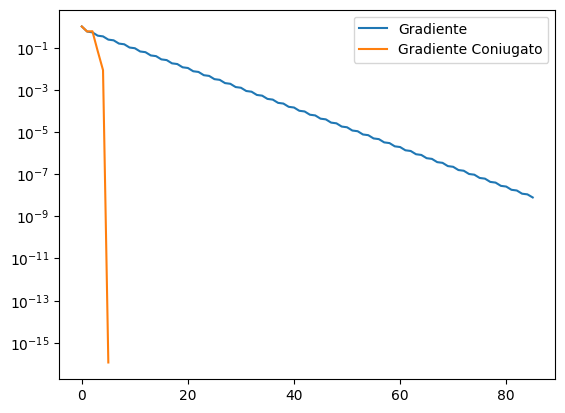

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def creaPoisson(n):
    return np.eye(n)*4 + (np.eye(n, k=1)+np.eye(n, k=-1)+np.eye(n, k=3)+np.eye(n, k=-3))*-1

n=10
A=creaPoisson(n)
print("Condizionameto di A", np.linalg.cond(A))
b=np.sum(A,axis=1).reshape(n,1)
toll=1e-8
it_max=10000
n=A.shape[0]
x0=np.zeros_like(b)

x_gr,vet_r_gr,vec_sol_gr,itG=steepestdescent(A,b,x0,it_max,toll)
print("Iterazioni Gradiente ",itG)
x_cg,vet_r_cg,vec_sol_cg,itCG=conjugate_gradient(A,b,x0,it_max,toll)
print("Iterazioni Gradiente Coniugato ",itCG)

plt.semilogy(np.arange(itG+1),vet_r_gr, label="Gradiente")
plt.semilogy(np.arange(itCG+1),vet_r_cg, label="Gradiente Coniugato")
plt.legend()
plt.show()

## Esercizio 4
Consideriamo il sistema lineare Ax=b  dov A è  la matrice di Hilbert di dimensione 5, costruita usando la funzione hilbert(n) di scipy.linalg (A=scipy.linalg.hilbert(5)) in modo tale che la soluzione esatta sia $x = (1, 1, . . . , 1)^T$ .
Risolvere il sistema lineare usando sia il metodi del gradiente e  visualizzare gli errori ad ogni iterazione.

Condizionameto di A 476607.2502425855
Iterazioni Gradiente  10001
Iterazioni Gradiente Coniugato  4


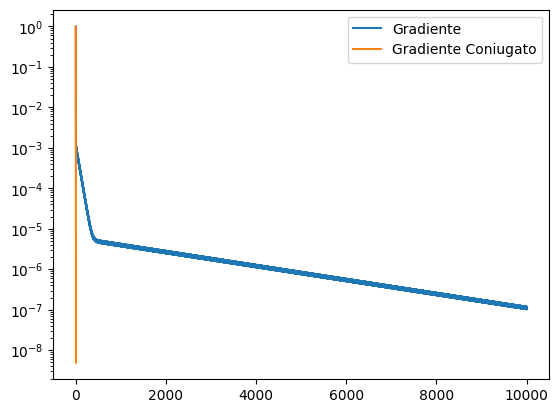

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

n=5
A=sp.linalg.hilbert(n)
print("Condizionameto di A", np.linalg.cond(A))
b=np.sum(A,axis=1).reshape(n,1)
toll=1e-8
it_max=10000
n=A.shape[0]
x0=np.zeros_like(b)

x_gr,vet_r_gr,vec_sol_gr,itG=steepestdescent(A,b,x0,it_max,toll)
print("Iterazioni Gradiente ",itG)
x_cg,vet_r_cg,vec_sol_cg,itCG=conjugate_gradient(A,b,x0,it_max,toll)
print("Iterazioni Gradiente Coniugato ",itCG)

plt.semilogy(np.arange(itG+1),vet_r_gr, label="Gradiente")
plt.semilogy(np.arange(itCG+1),vet_r_cg, label="Gradiente Coniugato")
plt.legend()
plt.show()

## Esercizio 5
Importare il file creaG ed utilizzare le funzioni sottospecificate per creare, scelto $n$,  una matrice D di ordine $m=(n-2)^2$

*import creaG*

*G = creaG.numgrid(n)*

*D = creaG.delsq(G).todense().getA()*

Risolvere il sistema lineare Dx=b, con matrice G di ordine m=16 ed ordine m=400, (scegliere n in maniera opportuna), usando il metodo del gradiente. Visualizzare graficamente l'errore ad ogni iterazione.

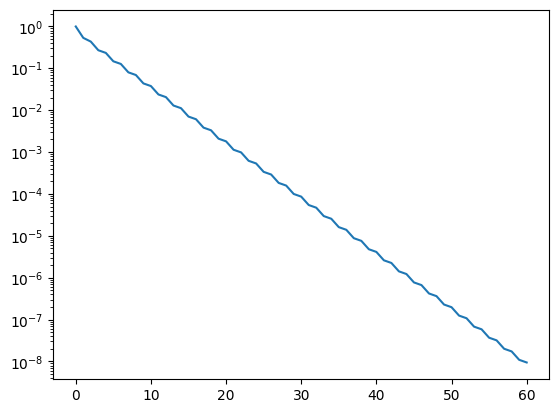

In [15]:
import numpy as np
import matplotlib.pyplot as sp
from creaG import *

m = 16
# m = 400
n = int(np.sqrt(m) + 2)

G = numgrid(n)
D = delsq(G).todense().getA()

nD = D.shape[0]
x0 = np.zeros((nD, 1))
x = np.ones((nD, 1))
b = np.sum(D, axis=1).reshape((nD, -1))

toll=1e-8
it_max=10000

x,vet_r,vec_sol,it = steepestdescent(D,b,x0,it_max,toll)
plt.semilogy(np.arange(it+1),vet_r)
plt.show()